<a href="https://colab.research.google.com/github/m-barati/InformationScience/blob/main/NLP_Week_2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import spacy

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
from collections import Counter

set_config(display="diagram")

nlp = spacy.load("en_core_web_sm")
nlp_en = spacy.blank("en") 

In [4]:
nli_train = pd.read_csv('TOEFL-train.csv')
nli_test = pd.read_csv('TOEFL-test.csv')

print(nli_train.head())
len(nli_train), len(nli_test)

   id                                              essay label
0   3  Traveling around the world and discovering new...   ARA
1  20  I agree , becouse ther ars to many cars we uos...   ARA
2  25  I agree with the statement because most of the...   ARA
3  35  I agree that the best for anyone is to travel ...   ARA
4  44  I beleive that having abroad knowledge is agoo...   ARA


(12100, 1100)

In [5]:
def count_dict (txt):
    doc = nlp(txt)
    tags = Counter(token.pos_ for token in doc)
    return tags

def ttr (txt):
    doc = nlp(txt)
    ttr = len(set(token.pos_ for token in doc)) / len(doc)
    return ttr

def punct_prob (txt):
    doc = nlp(txt)
    punct = Counter([token.text for token in doc if token.pos_ == 'PUNCT'])
    pp = {}
    for key, value in punct.items():
        pp[key] = value / len(doc)
    return pp

def add_cols (df):
    df['ttr'] = df['essay'].apply(ttr)
    pp = df['essay'].apply(punct_prob)
    dict_vect = DictVectorizer(sparse = False)
    vect_pp = dict_vect.fit_transform(pp)
    feats = dict_vect.get_feature_names()
    pp_df = pd.DataFrame(vect_pp, index = df.index)
    pp_df.columns = feats
    final_df = pd.concat([df, pp_df], axis = 1)
    return final_df

def complexity (txt):
    doc = nlp(txt)
    sent_len_values = [len(sent) for sent in doc.sents]
    word_len_values = [len(token) for token in doc]
    return sum(sent_len_values)/len(sent_len_values), sum(word_len_values)/len(word_len_values)

def pos_tag (txt):
    doc = nlp(txt)
    return " ".join([token.pos_ for token in doc])

In [6]:
essays = nli_train.essay.values
pos_essays = [pos_tag(essay) for essay in essays]
nli_train['pos'] = pos_essays

essays = nli_test.essay.values
pos_essays = [pos_tag(essay) for essay in essays]
nli_test['pos'] = pos_essays

essays = nli_train.essay.values
readability_essays = [complexity(essay) for essay in essays]

readability_words = [measure[1] for measure in readability_essays]
readability_sents = [measure[0] for measure in readability_essays]

nli_train['readability_words'] = readability_words
nli_train['readability_sents'] = readability_sents


essays = nli_test.essay.values
readability_essays = [complexity(essay) for essay in essays]

readability_words = [measure[1] for measure in readability_essays]
readability_sents = [measure[0] for measure in readability_essays]

nli_test['readability_words'] = readability_words
nli_test['readability_sents'] = readability_sents

In [7]:
add_cols(nli_train)
add_cols(nli_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,essay,label,pos,readability_words,readability_sents,ttr,!,','',...,;,?,[,],`,didnt't,does't,r,s,~
0,1120,Taking risk is the very instinctive human beha...,ARA,VERB NOUN AUX DET ADV ADJ ADJ NOUN DET VERB PR...,3.746439,21.937500,0.039886,0.000000,0.002849,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1159,Are most of the people living nowadays success...,ARA,AUX ADJ ADP DET NOUN VERB ADV ADJ PUNCT SPACE ...,3.661102,17.114286,0.023372,0.001669,0.000000,0.011686,...,0.006678,0.015025,0.0,0.0,0.026711,0.0,0.0,0.0,0.0,0.0
2,1180,I agree to the statement and disagree at the s...,ARA,PRON VERB ADP DET NOUN CCONJ VERB ADP DET ADJ ...,3.578947,32.153846,0.033493,0.000000,0.016746,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,1186,Any company has at least an objective to incre...,ARA,DET NOUN AUX ADP ADJ DET NOUN PART VERB DET NO...,4.257732,24.250000,0.041237,0.000000,0.000000,0.000000,...,0.000000,0.002577,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1207,"I strongly disagree , because the future of an...",ARA,PRON ADV VERB PUNCT SCONJ DET NOUN ADP DET NOU...,3.958824,22.666667,0.038235,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2173,I am strongly with the argument that assumpts ...,TUR,PRON AUX ADV ADP DET NOUN DET VERB ADJ NOUN VE...,4.208459,15.761905,0.042296,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1096,2175,Successful people are generally differs from t...,TUR,ADJ NOUN AUX ADV NOUN ADP DET ADJ NOUN ADP DET...,3.951157,15.560000,0.041131,0.000000,0.000000,0.002571,...,0.000000,0.000000,0.0,0.0,0.005141,0.0,0.0,0.0,0.0,0.0
1097,2180,I agree with the statement .\nThere are lots o...,TUR,PRON VERB ADP DET NOUN PUNCT SPACE PRON AUX NO...,4.094340,17.666667,0.040431,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.005391,0.0,0.0,0.0,0.0,0.0
1098,2186,All around the world the schools educate stude...,TUR,ADV ADP DET NOUN DET NOUN VERB NOUN ADP NOUN A...,4.135542,23.714286,0.039157,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
nli_train.head()

,id,essay,label,pos,readability_words,readability_sents,ttr
0,3,Traveling around the world and discovering new...,ARA,VERB ADP DET NOUN CCONJ VERB ADJ NOUN PRON ADV...,3.768473,25.375000,0.036946
1,20,"I agree , becouse ther ars to many cars we uos...",ARA,PRON VERB PUNCT VERB ADV NOUN ADP ADJ NOUN PRO...,3.343891,20.090909,0.072398
2,25,I agree with the statement because most of the...,ARA,PRON VERB ADP DET NOUN SCONJ ADJ ADP DET DET N...,3.784861,14.764706,0.055777
3,35,I agree that the best for anyone is to travel ...,ARA,PRON VERB SCONJ DET ADJ ADP PRON AUX PART VERB...,3.519553,19.888889,0.083799
4,44,I beleive that having abroad knowledge is agoo...,ARA,PRON VERB SCONJ VERB ADV NOUN AUX NOUN NOUN PU...,4.237179,26.000000,0.102564


In [10]:
nli_test.head()

,id,essay,label,pos,readability_words,readability_sents,ttr
0,1120,Taking risk is the very instinctive human beha...,ARA,VERB NOUN AUX DET ADV ADJ ADJ NOUN DET VERB PR...,3.746439,21.937500,0.039886
1,1159,Are most of the people living nowadays success...,ARA,AUX ADJ ADP DET NOUN VERB ADV ADJ PUNCT SPACE ...,3.661102,17.114286,0.023372
2,1180,I agree to the statement and disagree at the s...,ARA,PRON VERB ADP DET NOUN CCONJ VERB ADP DET ADJ ...,3.578947,32.153846,0.033493
3,1186,Any company has at least an objective to incre...,ARA,DET NOUN AUX ADP ADJ DET NOUN PART VERB DET NO...,4.257732,24.250000,0.041237
4,1207,"I strongly disagree , because the future of an...",ARA,PRON ADV VERB PUNCT SCONJ DET NOUN ADP DET NOU...,3.958824,22.666667,0.038235


In [14]:
scaler = StandardScaler()

vect1 = TfidfVectorizer(max_features=5000, ngram_range=(1,2), lowercase=False)
vect2 = TfidfVectorizer(max_features=100, ngram_range=(1,4), lowercase=False)

preprocessor = make_column_transformer(
    (scaler, ['readability_words','readability_sents']),
    (scaler, ['ttr']),
    (vect1, 'essay'),
    (vect2, 'pos'),
    remainder = 'drop')

clf = SGDClassifier(random_state=42)

pipe = make_pipeline(preprocessor, clf)

In [15]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler-1',
                                                  StandardScaler(),
                                                  ['readability_words',
                                                   'readability_sents']),
                                                 ('standardscaler-2',
                                                  StandardScaler(), ['ttr']),
                                                 ('tfidfvectorizer-1',
                                                  TfidfVectorizer(lowercase=False,
                                                                  max_features=5000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'essay'),
                                                 ('tfidfvectorizer-2',
                                                  TfidfVectorizer(lowercase=False,
                                                                  max_features=100,
                                                                  ngram_range=(1,
                                                                               4)),
                                                  'pos')])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

              precision    recall  f1-score   support

         ARA       0.77      0.75      0.76       100
         CHI       0.78      0.90      0.84       100
         FRE       0.75      0.83      0.79       100
         GER       0.84      0.92      0.88       100
         HIN       0.69      0.69      0.69       100
         ITA       0.87      0.76      0.81       100
         JPN       0.75      0.85      0.79       100
         KOR       0.83      0.68      0.75       100
         SPA       0.76      0.63      0.69       100
         TEL       0.68      0.77      0.72       100
         TUR       0.82      0.73      0.77       100

    accuracy                           0.77      1100
   macro avg       0.78      0.77      0.77      1100
weighted avg       0.78      0.77      0.77      1100



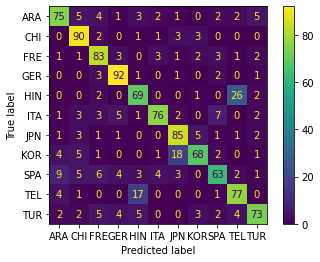

In [16]:
X_train = nli_train
y_train = nli_train.label
X_test = nli_test
y_test = nli_test.label

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()